In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('marketing_data.csv')

In [3]:
data.sample(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,Country
1113,2157,1972,Graduation,Together,"$26,290.00",1,1,2013-01-12,49,15,...,4,6,0,0,0,0,0,0,0,CA
714,4168,1966,Graduation,Single,"$37,070.00",1,1,2013-03-20,30,231,...,8,7,0,0,0,0,0,1,0,SP
2062,9197,1953,Graduation,Married,"$39,722.00",0,1,2014-02-24,92,32,...,3,5,0,0,0,0,0,0,0,SP
2223,2831,1976,Graduation,Together,"$78,416.00",0,1,2014-06-27,99,453,...,10,3,0,0,0,0,0,0,0,SP
2041,1291,1978,PhD,Together,"$27,683.00",1,0,2012-08-04,90,152,...,4,8,0,0,0,0,0,0,0,SP
1285,5012,1989,Graduation,Married,"$28,691.00",1,0,2013-07-04,56,5,...,3,8,0,0,0,0,0,0,0,SP
249,1071,1976,PhD,Divorced,"$70,179.00",0,1,2013-07-21,10,532,...,13,5,0,0,0,0,0,0,0,US
57,3066,1975,PhD,Together,"$61,905.00",0,1,2014-02-04,2,167,...,4,5,0,0,0,0,0,0,0,SA
1766,10091,1956,Graduation,Single,"$60,230.00",0,1,2013-05-20,78,520,...,6,5,0,0,0,0,0,0,0,SP
1440,10542,1968,PhD,Married,"$36,778.00",1,1,2012-08-05,63,29,...,3,9,0,0,0,0,0,0,0,SP


In [4]:
data['Complain'].sum() / data['Complain'].count() * 100

0.9375

not a high ratio of complains

In [5]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Response', 'Complain', 'Country'],
      dtype='object')

In [6]:
data.rename(columns={' Income ' : 'income'} , inplace=True)

In [7]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp1            0
AcceptedCmp2            0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
Response                0
Complain                0
Country                 0
dtype: int64

In [8]:
data.dropna(inplace=True)

In [9]:
data['income']=data['income'].str.replace('$','').str.replace(',','').str.replace('.','').astype(int)
data['income']= data['income']/100

In [10]:
def acceptance(df,col):
    camp_acc = df[col].sum() / df[col].count() *100
    return camp_acc 

In [11]:
campaigns = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']
n=1
for camp in campaigns :
    acceptance(data,camp)
    print(f"acceptance for campaign {n} is {acceptance(data,camp)}%")
    n=n+1

acceptance for campaign 1 is 6.407942238267148%
acceptance for campaign 2 is 1.3537906137184115%
acceptance for campaign 3 is 7.355595667870037%
acceptance for campaign 4 is 7.400722021660649%
acceptance for campaign 5 is 7.310469314079422%


as we can see the acceptance ratio in all campaigns doesn't exceed 8% , it can be due to a wrong targeting problem, which can be solved by a good customer segmentation . 

In [12]:
demo = data[['Year_Birth','Education','Marital_Status','income','Kidhome' ,'Teenhome']]
demo.head()

,Year_Birth,Education,Marital_Status,income,Kidhome,Teenhome
0,1970,Graduation,Divorced,84835.0,0,0
1,1961,Graduation,Single,57091.0,0,0
2,1958,Graduation,Married,67267.0,0,1
3,1967,Graduation,Together,32474.0,1,1
4,1989,Graduation,Single,21474.0,1,0


In [13]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year_Birth      2216 non-null   int64  
 1   Education       2216 non-null   object 
 2   Marital_Status  2216 non-null   object 
 3   income          2216 non-null   float64
 4   Kidhome         2216 non-null   int64  
 5   Teenhome        2216 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 121.2+ KB


In [14]:
demo.describe()

,Year_Birth,income,Kidhome,Teenhome
count,2216.000000,2216.000000,2216.000000,2216.000000
mean,1968.820397,52247.251354,0.441787,0.505415
std,11.985554,25173.076661,0.536896,0.544181
min,1893.000000,1730.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000
max,1996.000000,666666.000000,2.000000,2.000000


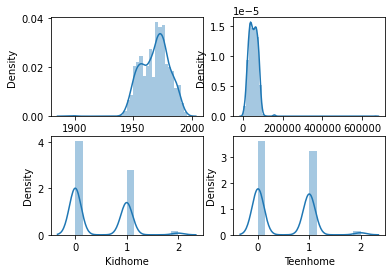

In [15]:
fig , axes = plt.subplots(2,2)
sns.distplot(demo['Year_Birth'],ax=axes[0,0])
sns.distplot(demo['income'],ax=axes[0,1])
sns.distplot(demo['Kidhome'],ax=axes[1,0])
sns.distplot(demo['Teenhome'],ax=axes[1,1])
plt.show()

In [16]:
#encoding Marital_Status and Education
code = {}
cols = ['Marital_Status' , 'Education']
for col in cols:
    code[col] = LabelEncoder().fit(demo[col])
code

{'Marital_Status': LabelEncoder(), 'Education': LabelEncoder()}

In [17]:
for col in cols :
    demo[col] = code[col].transform(demo[col])

In [18]:
demo.head()

,Year_Birth,Education,Marital_Status,income,Kidhome,Teenhome
0,1970,2,2,84835.0,0,0
1,1961,2,4,57091.0,0,0
2,1958,2,3,67267.0,0,1
3,1967,2,5,32474.0,1,1
4,1989,2,4,21474.0,1,0


In [19]:
scaler = StandardScaler()
scaler.fit(demo)#scaling 
nor_demo = scaler.transform(demo) #standarization
print(nor_demo.mean(axis=0).round(2))
print(nor_demo.std(axis=0).round(2))

[ 0.  0. -0.  0. -0.  0.]
[1. 1. 1. 1. 1. 1.]


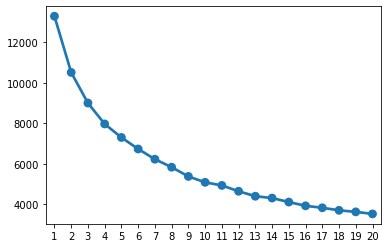

In [20]:
sse = {}
for k in range (1,21):
    kmeans = KMeans(n_clusters = k , random_state = 1)
    kmeans.fit(nor_demo)
    sse[k] = kmeans.inertia_
    
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [21]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit_predict(nor_demo)
labels = kmeans.labels_
demo['segment']=labels
for col in cols :
    demo[col] = code[col].inverse_transform(demo[col])
demo.head()

,Year_Birth,Education,Marital_Status,income,Kidhome,Teenhome,segment
0,1970,Graduation,Divorced,84835.0,0,0,1
1,1961,Graduation,Single,57091.0,0,0,1
2,1958,Graduation,Married,67267.0,0,1,4
3,1967,Graduation,Together,32474.0,1,1,2
4,1989,Graduation,Single,21474.0,1,0,3


In [22]:
sg0 = demo[demo['segment'] == 0]
sg1 = demo[demo['segment'] == 1]
sg2 = demo[demo['segment'] == 2]
sg3 = demo[demo['segment'] == 3]
sg4 = demo[demo['segment'] == 4]

In [23]:
print(f'segment 0 {sg0.shape}')
print(f'segment 1 {sg1.shape}')
print(f'segment 2 {sg2.shape}')
print(f'segment 3 {sg3.shape}')
print(f'segment 4 {sg4.shape}')

segment 0 (332, 7)
segment 1 (457, 7)
segment 2 (410, 7)
segment 3 (577, 7)
segment 4 (440, 7)


<BarContainer object of 4 artists>

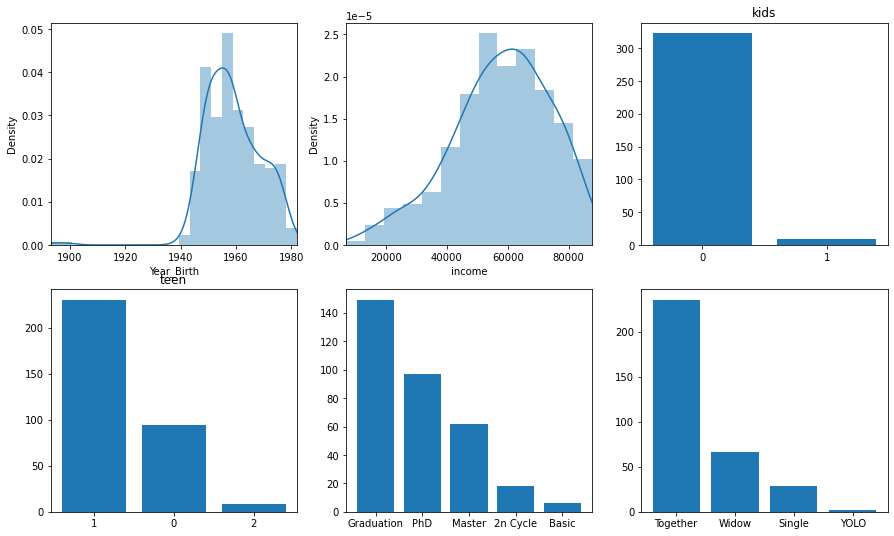

In [24]:
sg0['Kidhome'] = sg0['Kidhome'].astype(str)
by_kidhome0 = sg0.groupby('Kidhome')['Kidhome'].aggregate('count').sort_values(ascending=False).to_dict()
sg0['Teenhome'] = sg0['Teenhome'].astype(str)
by_teenhome0 = sg0.groupby('Teenhome')['Teenhome'].aggregate('count').sort_values(ascending=False).to_dict()
by_education0 = sg0.groupby('Education')['Education'].aggregate('count').sort_values(ascending=False).to_dict()
by_marital0 = sg0.groupby('Marital_Status')['Marital_Status'].aggregate('count').sort_values(ascending=False).to_dict()

fig , axes = plt.subplots(2,3 , figsize=(15,9))

sns.distplot(sg0['Year_Birth'],ax=axes[0,0])
axes[0,0].set_xlim(sg0['Year_Birth'].min(),sg0['Year_Birth'].max())

sns.distplot(sg0['income'],ax=axes[0,1])
axes[0,1].set_xlim(sg0['income'].min(),sg0['income'].max())

x_kid = list(by_kidhome0.keys())
y_kid = list(by_kidhome0.values())
axes[0,2].bar(range(len(x_kid)), y_kid , tick_label= x_kid)
axes[0,2].set_title('kids')


x_teen = list(by_teenhome0.keys())
y_teen = list(by_teenhome0.values())
axes[1,0].bar(range(len(x_teen)), y_teen , tick_label= x_teen)
axes[1,0].set_title('teen')

x_edu = list(by_education0.keys())
y_edu = list(by_education0.values())
axes[1,1].bar(range(len(x_edu)), y_edu , tick_label= x_edu)

x_mar = list(by_marital0.keys())
y_mar = list(by_marital0.values())
axes[1,2].bar(range(len(x_mar)), y_mar , tick_label= x_mar)


<BarContainer object of 5 artists>

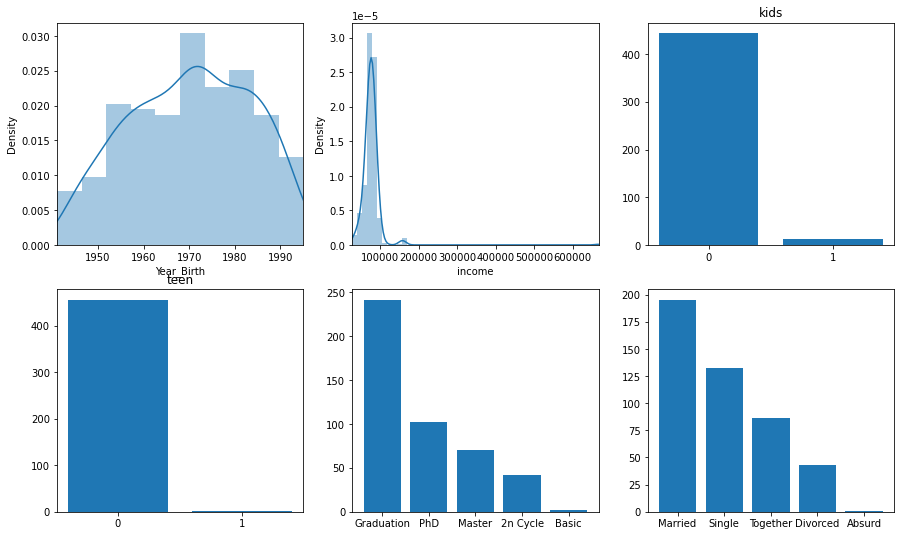

In [25]:
sg1['Kidhome'] = sg1['Kidhome'].astype(str)
by_kidhome1 = sg1.groupby('Kidhome')['Kidhome'].aggregate('count').sort_values(ascending=False).to_dict()

sg1['Teenhome'] = sg1['Teenhome'].astype(str)
by_teenhome1 = sg1.groupby('Teenhome')['Teenhome'].aggregate('count').sort_values(ascending=False).to_dict()

by_education1 = sg1.groupby('Education')['Education'].aggregate('count').sort_values(ascending=False).to_dict()

by_marital1 = sg1.groupby('Marital_Status')['Marital_Status'].aggregate('count').sort_values(ascending=False).to_dict()


fig , axes = plt.subplots(2,3 , figsize=(15,9))


sns.distplot(sg1['Year_Birth'],ax=axes[0,0])
axes[0,0].set_xlim(sg1['Year_Birth'].min(),sg1['Year_Birth'].max())

sns.distplot(sg1['income'],ax=axes[0,1])
axes[0,1].set_xlim(sg1['income'].min(),sg1['income'].max())

x_kid1 = list(by_kidhome1.keys())
y_kid1 = list(by_kidhome1.values())
axes[0,2].bar(range(len(x_kid1)), y_kid1 , tick_label= x_kid1)
axes[0,2].set_title('kids')


x_teen1 = list(by_teenhome1.keys())
y_teen1 = list(by_teenhome1.values())
axes[1,0].bar(range(len(x_teen1)), y_teen1 , tick_label= x_teen1)
axes[1,0].set_title('teen')

x_edu1 = list(by_education1.keys())
y_edu1 = list(by_education1.values())
axes[1,1].bar(range(len(x_edu1)), y_edu1 , tick_label= x_edu1)

x_mar1 = list(by_marital1.keys())
y_mar1 = list(by_marital1.values())
axes[1,2].bar(range(len(x_mar1)), y_mar1 , tick_label= x_mar1)

<BarContainer object of 6 artists>

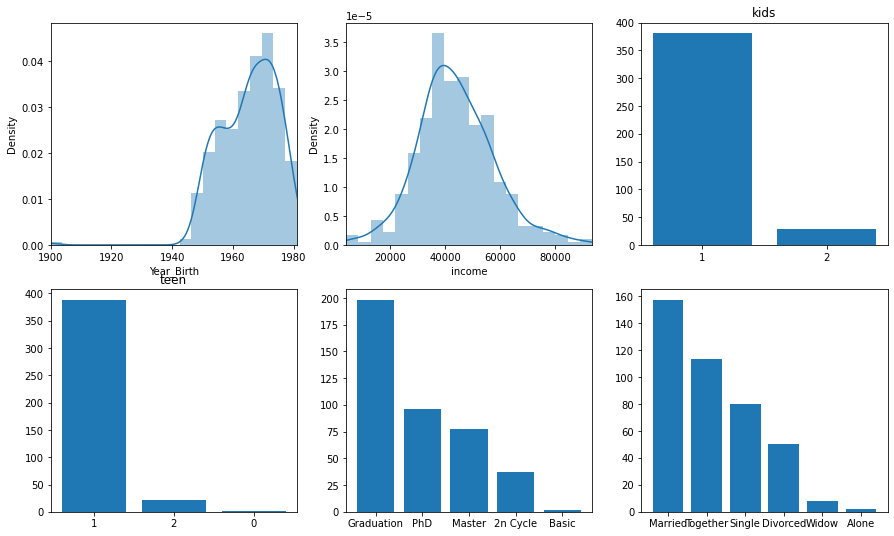

In [26]:
sg2['Kidhome'] = sg2['Kidhome'].astype(str)
by_kidhome2 = sg2.groupby('Kidhome')['Kidhome'].aggregate('count').sort_values(ascending=False).to_dict()

sg2['Teenhome'] = sg2['Teenhome'].astype(str)
by_teenhome2 = sg2.groupby('Teenhome')['Teenhome'].aggregate('count').sort_values(ascending=False).to_dict()

by_education2 = sg2.groupby('Education')['Education'].aggregate('count').sort_values(ascending=False).to_dict()

by_marital2 = sg2.groupby('Marital_Status')['Marital_Status'].aggregate('count').sort_values(ascending=False).to_dict()


fig , axes = plt.subplots(2,3 , figsize=(15,9))


sns.distplot(sg2['Year_Birth'],ax=axes[0,0])
axes[0,0].set_xlim(sg2['Year_Birth'].min(),sg2['Year_Birth'].max())

sns.distplot(sg2['income'],ax=axes[0,1])
axes[0,1].set_xlim(sg2['income'].min(),sg2['income'].max())

x_kid2 = list(by_kidhome2.keys())
y_kid2 = list(by_kidhome2.values())
axes[0,2].bar(range(len(x_kid2)), y_kid2 , tick_label= x_kid2)
axes[0,2].set_title('kids')


x_teen2 = list(by_teenhome2.keys())
y_teen2 = list(by_teenhome2.values())
axes[1,0].bar(range(len(x_teen2)), y_teen2 , tick_label= x_teen2)
axes[1,0].set_title('teen')

x_edu2 = list(by_education2.keys())
y_edu2 = list(by_education2.values())
axes[1,1].bar(range(len(x_edu2)), y_edu2 , tick_label= x_edu2)

x_mar2 = list(by_marital2.keys())
y_mar2 = list(by_marital2.values())
axes[1,2].bar(range(len(x_mar2)), y_mar2 , tick_label= x_mar2)

<BarContainer object of 6 artists>

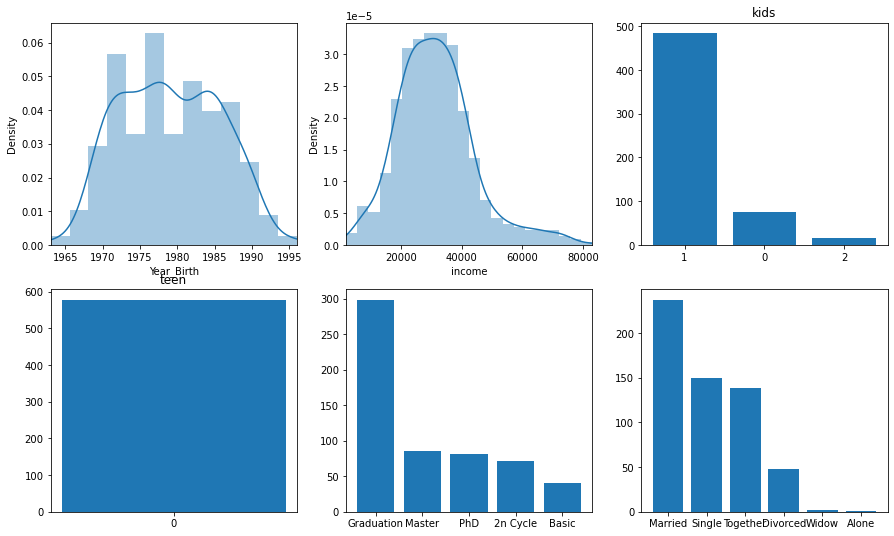

In [27]:
sg3['Kidhome'] = sg3['Kidhome'].astype(str)
by_kidhome3 = sg3.groupby('Kidhome')['Kidhome'].aggregate('count').sort_values(ascending=False).to_dict()

sg3['Teenhome'] = sg3['Teenhome'].astype(str)
by_teenhome3 = sg3.groupby('Teenhome')['Teenhome'].aggregate('count').sort_values(ascending=False).to_dict()

by_education3 = sg3.groupby('Education')['Education'].aggregate('count').sort_values(ascending=False).to_dict()

by_marital3 = sg3.groupby('Marital_Status')['Marital_Status'].aggregate('count').sort_values(ascending=False).to_dict()

fig , axes = plt.subplots(2,3 , figsize=(15,9))

sns.distplot(sg3['Year_Birth'],ax=axes[0,0])
axes[0,0].set_xlim(sg3['Year_Birth'].min(),sg3['Year_Birth'].max())

sns.distplot(sg3['income'],ax=axes[0,1])
axes[0,1].set_xlim(sg3['income'].min(),sg3['income'].max())

x_kid3 = list(by_kidhome3.keys())
y_kid3 = list(by_kidhome3.values())
axes[0,2].bar(range(len(x_kid3)), y_kid3 , tick_label= x_kid3)
axes[0,2].set_title('kids')


x_teen3 = list(by_teenhome3.keys())
y_teen3 = list(by_teenhome3.values())
axes[1,0].bar(range(len(x_teen3)), y_teen3 , tick_label= x_teen3)
axes[1,0].set_title('teen')

x_edu3 = list(by_education3.keys())
y_edu3 = list(by_education3.values())
axes[1,1].bar(range(len(x_edu3)), y_edu3 , tick_label= x_edu3)

x_mar3 = list(by_marital3.keys())
y_mar3 = list(by_marital3.values())
axes[1,2].bar(range(len(x_mar3)), y_mar3 , tick_label= x_mar3)

<BarContainer object of 4 artists>

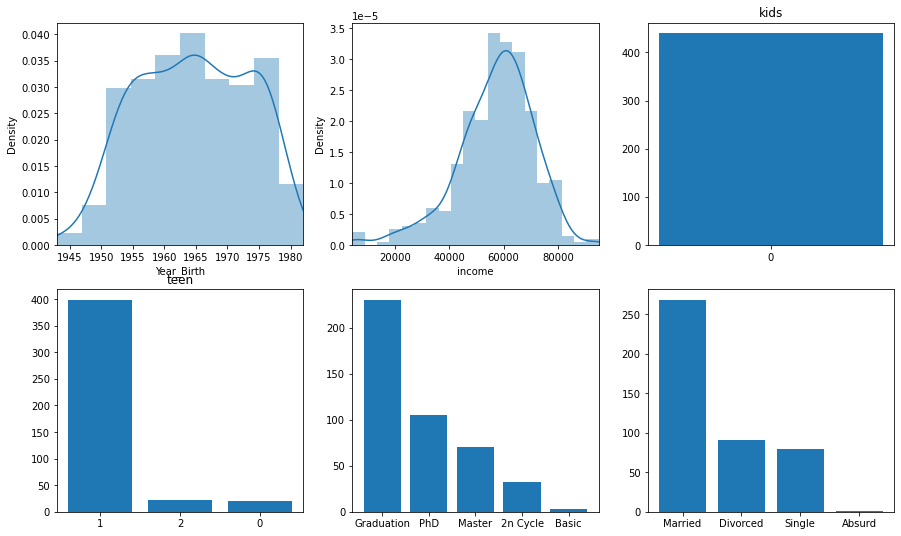

In [28]:
sg4['Kidhome'] = sg4['Kidhome'].astype(str)
by_kidhome4 = sg4.groupby('Kidhome')['Kidhome'].aggregate('count').sort_values(ascending=False).to_dict()

sg4['Teenhome'] = sg4['Teenhome'].astype(str)
by_teenhome4 = sg4.groupby('Teenhome')['Teenhome'].aggregate('count').sort_values(ascending=False).to_dict()

by_education4 = sg4.groupby('Education')['Education'].aggregate('count').sort_values(ascending=False).to_dict()

by_marital4 = sg4.groupby('Marital_Status')['Marital_Status'].aggregate('count').sort_values(ascending=False).to_dict()

fig , axes = plt.subplots(2,3 , figsize=(15,9))


sns.distplot(sg4['Year_Birth'],ax=axes[0,0])
axes[0,0].set_xlim(sg4['Year_Birth'].min(),sg4['Year_Birth'].max())


sns.distplot(sg4['income'],ax=axes[0,1])
axes[0,1].set_xlim(sg4['income'].min(),sg4['income'].max())

x_kid4 = list(by_kidhome4.keys())
y_kid4 = list(by_kidhome4.values())
axes[0,2].bar(range(len(x_kid4)), y_kid4 , tick_label= x_kid4)
axes[0,2].set_title('kids')


x_teen4 = list(by_teenhome4.keys())
y_teen4 = list(by_teenhome4.values())
axes[1,0].bar(range(len(x_teen4)), y_teen4 , tick_label= x_teen4)
axes[1,0].set_title('teen')

x_edu4 = list(by_education4.keys())
y_edu4 = list(by_education4.values())
axes[1,1].bar(range(len(x_edu4)), y_edu4 , tick_label= x_edu4)

x_mar4 = list(by_marital4.keys())
y_mar4 = list(by_marital4.values())
axes[1,2].bar(range(len(x_mar4)), y_mar4 , tick_label= x_mar4)